In [1]:
from ray import train, tune
from ray.tune import CLIReporter
from ray.tune.schedulers import ASHAScheduler
from ray.tune.search.hyperopt import HyperOptSearch

In [2]:
def objective(config):
    score = config['x'] ** 2 + config['y']
    for epoch in range(config['epochs']):
        score *= 1.1
        train.report({'score': score})
    # return {'score': score}

In [3]:
search_space = {
    'x': tune.grid_search([0.001, 0.01, 0.1, 1.]),
    'y': tune.choice([1,2,3]),
    'epochs': 100
}

In [4]:
tuner = tune.Tuner(objective, param_space=search_space)
results = tuner.fit()
print(results.get_best_result(metric="score", mode="min").config)

2024-03-26 16:03:22,385	INFO tune.py:1042 -- Total run time: 3.31 seconds (2.06 seconds for the tuning loop).


{'x': 0.001, 'y': 1, 'epochs': 100}


In [5]:
tuner = tune.Tuner(
    objective,
    tune_config=tune.TuneConfig(
        num_samples=20,
        scheduler=ASHAScheduler(metric='score', mode='max')
    ),
    param_space=search_space
)
results = tuner.fit()

(bundle_reservation_check_func pid=63208) Traceback (most recent call last):
(bundle_reservation_check_func pid=63208)   File "python\ray\_raylet.pyx", line 2102, in ray._raylet.execute_task_with_cancellation_handler
(bundle_reservation_check_func pid=63208)   File "python\ray\_raylet.pyx", line 1756, in ray._raylet.execute_task
(bundle_reservation_check_func pid=63208)   File "python\ray\_raylet.pyx", line 1757, in ray._raylet.execute_task
(bundle_reservation_check_func pid=63208)   File "python\ray\_raylet.pyx", line 1760, in ray._raylet.execute_task
(bundle_reservation_check_func pid=63208)   File "python\ray\_raylet.pyx", line 1788, in ray._raylet.execute_task
(bundle_reservation_check_func pid=63208)   File "C:\Users\johan\.conda\envs\Masterarbeit_PTGNN\lib\site-packages\ray\_private\utils.py", line 1852, in __exit__
(bundle_reservation_check_func pid=63208)     raise KeyboardInterrupt
(bundle_reservation_check_func pid=63208) KeyboardInterrupt
(bundle_reservation_check_func pid=6

In [6]:
results

ResultGrid<[
  Result(
    metrics={'score': 891.5835826967541},
    path='C:/Users/johan/ray_results/objective_2024-03-26_16-03-22/objective_fd119_00000_0_x=0.0010,y=2_2024-03-26_16-03-22',
    filesystem='local',
    checkpoint=None
  ),
  Result(
    metrics={'score': 1337.4192845146217},
    path='C:/Users/johan/ray_results/objective_2024-03-26_16-03-22/objective_fd119_00001_1_x=0.0100,y=3_2024-03-26_16-03-22',
    filesystem='local',
    checkpoint=None
  ),
  Result(
    metrics={'score': 1.1110000000000002},
    path='C:/Users/johan/ray_results/objective_2024-03-26_16-03-22/objective_fd119_00002_2_x=0.1000,y=1_2024-03-26_16-03-22',
    filesystem='local',
    checkpoint=None
  ),
  Result(
    metrics={'score': 4.392300000000001},
    path='C:/Users/johan/ray_results/objective_2024-03-26_16-03-22/objective_fd119_00003_3_x=1.0000,y=2_2024-03-26_16-03-22',
    filesystem='local',
    checkpoint=None
  ),
  Result(
    metrics={'score': 2.2000011},
    path='C:/Users/johan/ray_resu

In [7]:
len(results)

80

In [8]:
dfs = {result.path: result.metrics_dataframe for result in results}

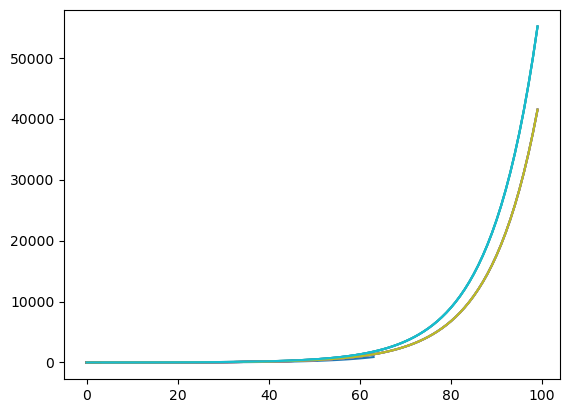

In [9]:
# Plot by epoch
ax = None  # This plots everything on the same plot
for d in dfs.values():
    ax = d.score.plot(ax=ax, legend=False)

In [10]:
from ray import train, tune
from ray.tune import CLIReporter
from ray.tune.schedulers import ASHAScheduler
from ray.tune.search.hyperopt import HyperOptSearch
from hyperopt import hp

In [11]:
def objective(config):
    score = config['x'] ** 2 + config['y']
    for epoch in range(config['epochs']):
        score *= 1.1
        train.report({'score': score})
    # return {'score': score}

In [12]:
search_space = {
    "x": hp.choice("x", [0.001, 0.01, 0.1, 1.]),
    "y": hp.choice("y", [1,2,3]),
}

In [13]:
search_space = {
    'x': tune.choice([0.001, 0.01, 0.1, 1.]),
    'y': tune.choice([1,2,3]),
    'epochs': 5
}

In [14]:
tuner = tune.Tuner(
    trainable=objective,
    param_space=search_space,
    tune_config=tune.TuneConfig(
        metric='score',
        mode='max',
        search_alg=HyperOptSearch(
            # space=search_space,
            metric='score',
            mode='max'
        ),
        scheduler=ASHAScheduler(
            #metric="score",
            #mode="max",
            max_t=1000,
            grace_period=5,
            reduction_factor=3,
            brackets = 1
        ),
        num_samples=1,
        max_concurrent_trials=3,
    ),
    run_config=train.RunConfig(
        progress_reporter=CLIReporter(
            metric_columns=["score"]
        )
    )
)
results = tuner.fit()

2024-03-26 16:18:36,187	INFO tune.py:583 -- [output] This uses the legacy output and progress reporter, as Jupyter notebooks are not supported by the new engine, yet. For more information, please see https://github.com/ray-project/ray/issues/36949


== Status ==
Current time: 2024-03-26 16:18:36 (running for 00:00:00.12)
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 405.000: None | Iter 135.000: None | Iter 45.000: None | Iter 15.000: None | Iter 5.000: None
Logical resource usage: 1.0/20 CPUs, 0/1 GPUs (0.0/1.0 accelerator_type:G)
Result logdir: C:/Users/johan/ray_results/objective_2024-03-26_16-18-36
Number of trials: 1/1 (1 PENDING)




2024-03-26 16:18:37,665	INFO tune.py:1042 -- Total run time: 1.48 seconds (1.47 seconds for the tuning loop).


== Status ==
Current time: 2024-03-26 16:18:37 (running for 00:00:01.47)
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 405.000: None | Iter 135.000: None | Iter 45.000: None | Iter 15.000: None | Iter 5.000: 1.6105116105100004
Logical resource usage: 1.0/20 CPUs, 0/1 GPUs (0.0/1.0 accelerator_type:G)
Current best trial: 51d4f768 with score=1.6105116105100004 and parameters={'x': 0.001, 'y': 1, 'epochs': 5}
Result logdir: C:/Users/johan/ray_results/objective_2024-03-26_16-18-36
Number of trials: 1/1 (1 TERMINATED)




In [15]:
results.get_dataframe()

,score,timestamp,checkpoint_dir_name,done,training_iteration,trial_id,date,time_this_iter_s,time_total_s,pid,hostname,node_ip,time_since_restore,iterations_since_restore,config/x,config/y,config/epochs,logdir
0,1.610512,1711466317,None,False,5,51d4f768,2024-03-26_16-18-37,0.0,0.0,16496,AT-MB-PC-E13,127.0.0.1,0.0,5,0.001,1,5,51d4f768


In [7]:
dfs = {result.path: result.metrics_dataframe for result in results}

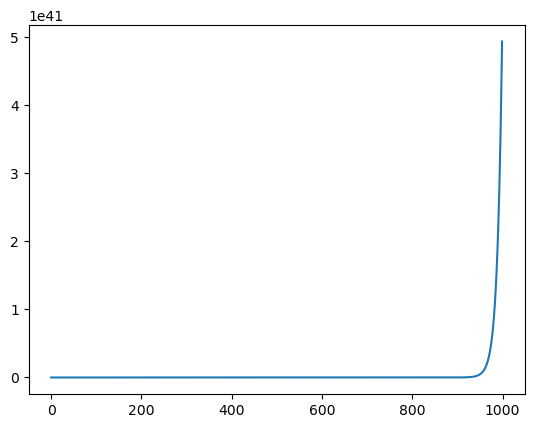

In [8]:
# Plot by epoch
ax = None  # This plots everything on the same plot
for d in dfs.values():
    ax = d.score.plot(ax=ax, legend=False)

In [9]:
d

,score,timestamp,checkpoint_dir_name,done,training_iteration,trial_id,date,time_this_iter_s,time_total_s,pid,hostname,node_ip,time_since_restore,iterations_since_restore,config/x,config/y,config/epochs
0,2.200001e+00,1711465989,None,False,1,555484d8,2024-03-26_16-13-09,0.0,0.000000,51388,AT-MB-PC-E13,127.0.0.1,0.000000,1,0.001,2,5000
1,2.420001e+00,1711465989,None,False,2,555484d8,2024-03-26_16-13-09,0.0,0.000000,51388,AT-MB-PC-E13,127.0.0.1,0.000000,2,0.001,2,5000
2,2.662001e+00,1711465989,None,False,3,555484d8,2024-03-26_16-13-09,0.0,0.000000,51388,AT-MB-PC-E13,127.0.0.1,0.000000,3,0.001,2,5000
3,2.928201e+00,1711465989,None,False,4,555484d8,2024-03-26_16-13-09,0.0,0.000000,51388,AT-MB-PC-E13,127.0.0.1,0.000000,4,0.001,2,5000
4,3.221022e+00,1711465989,None,False,5,555484d8,2024-03-26_16-13-09,0.0,0.000000,51388,AT-MB-PC-E13,127.0.0.1,0.000000,5,0.001,2,5000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3.373997e+41,1711465990,None,False,996,555484d8,2024-03-26_16-13-10,0.0,0.069868,51388,AT-MB-PC-E13,127.0.0.1,0.069868,996,0.001,2,5000
996,3.711396e+41,1711465990,None,False,997,555484d8,2024-03-26_16-13-10,0.0,0.069868,51388,AT-MB-PC-E13,127.0.0.1,0.069868,997,0.001,2,5000
997,4.082536e+41,1711465990,None,False,998,555484d8,2024-03-26_16-13-10,0.0,0.069868,51388,AT-MB-PC-E13,127.0.0.1,0.069868,998,0.001,2,5000
998,4.490789e+41,1711465990,None,False,999,555484d8,2024-03-26_16-13-10,0.0,0.069868,51388,AT-MB-PC-E13,127.0.0.1,0.069868,999,0.001,2,5000
